# Data Science and Visualization (RUC F2023)

## Lecture 6: Regression

 # Linear Regression

## 0. Importing the Required Libraries and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import and display first five rows of advertising dataset
# We set index_col=0 because in the dataset the first column constains the index (0, 1, 2, ...)
ads = pd.read_csv('Advertising.csv', index_col=0)
ads.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
ads.shape

(200, 4)

In [4]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 1. Linear Regression with *statsmodels*

The *statsmodels* module provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. We certainly can use it for linear regression.

### 1.1 Simple Linear Regression

First, we use a single column for X. We want to determine the coefficients for f(X) = α + β*X.

We use the **ols** method in the statsmodels library. Note its first argument: It specifies the column TV as X and the column Sales as y. So we want to determine the coefficients for Sales = α + β*TV.

In [5]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=ads)
model = model.fit()

We can show the parameters (coefficients) of the linear model f(X) = α + βX

* Intercept is α, the intercept
* TV (corresponding to X) is β, the slope

In [6]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

This means our linear model is: predicted_sales = 7.032594 + 0.047537*TV

Let's plot the data and the learned model

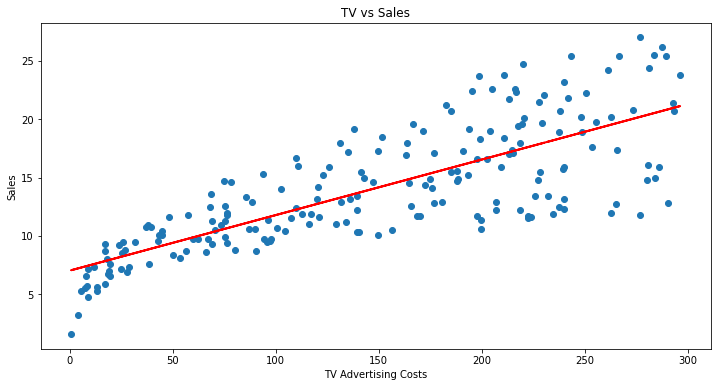

In [7]:
import matplotlib.pyplot as plt

# Predict values
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))

# To show the actual data as dots. The argument 'o' forces plt.plot() to plot the data as dots instead of connected lines
plt.plot(ads['TV'], ads['Sales'], 'o')

# To show the regression line. Note that ads['TV'] and sales_pred must form a straight line due to the linear regression.
plt.plot(ads['TV'], sales_pred, 'r', linewidth=2)

plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

There is a positive linear relationship between TV advertising costs and Sales. In other words, spending more on TV advertising is expected to lead to a higher value of sales!

With this model, we can predict sales from any amount spent on TV advertising. For instance, if we increase TV advertising costs to 500, what will be the sales?

In [8]:
new_X = 500
model.predict({"TV": new_X})

0    30.800914
dtype: float64

### 1.2 Multiple Linear Regression

Next, we use two columns for X.

In [9]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model_mlr = smf.ols('Sales ~ TV + Radio', data=ads)
model_mlr = model_mlr.fit()

We can show the parameters (coefficients) of the linear model.

* Intercept is α, the intercept
* TV is β1
* Radio is β2 

In [10]:
model_mlr.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

This means our linear model is: predicted_sales = 2.921100 + 0.045755\*TV + 0.187994\*Radio

Make a prediction for a pair of TV and Radio values:

In [11]:
model_mlr.predict({"TV": 500, "Radio": 60})

0    37.078161
dtype: float64

Predict the y value for all training data points:

In [12]:
# Predict values
sales_pred = model_mlr.predict()
sales_pred

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

Let's plot the data and linear model in a 3D space. We define a generic function to accept various data and coefficients.

In [13]:
def plotLinearRegression3D(X1, X2, y, intercept, beta1, beta2):
    
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # Plot the actual data as 3D points
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X1, X2, y, marker='.', color='blue')

    # Get the X and Y ranges
    xx = np.linspace(X1.min(), X1.max(), 2)
    yy = np.linspace(X2.min(), X2.max(), 2)

    # Create a meshgrid for X-Y
    x_surf, y_surf = np.meshgrid(xx, yy)

    # Calculate the Z values for X-Y, using the coefficients learned by the model
    z_surf = intercept + x_surf*beta1 + y_surf*beta2

    # Plot the 3D surface
    ax.plot_surface(x_surf, y_surf, z_surf, color='pink', alpha=0.5)

    # Set the labels and title
    ax.set_xlabel("TV")
    ax.set_ylabel("Radio")
    ax.set_zlabel("Sales")
    plt.title('TV + Radio vs Sales')

    plt.show()

We call the plot function for this model:

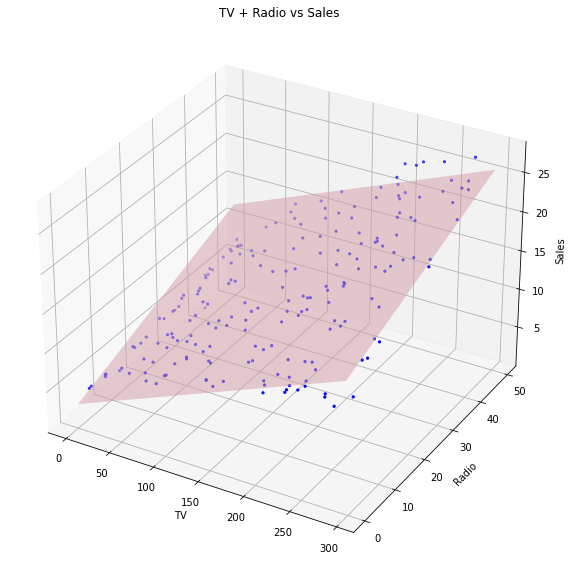

In [14]:
plotLinearRegression3D(ads.TV, ads.Radio, ads.Sales, model_mlr.params[0], model_mlr.params[1], model_mlr.params[2])

## 2. Linear Regression with *scikit-learn*

In [15]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
X = ads[['TV']]
y = ads['Sales']

# Initialise and fit model
lm = LinearRegression()
lm = lm.fit(X, y)

In [16]:
print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')

alpha = 7.032593549127693
betas = [0.04753664]


### 2.1 A multiple Linear Regression with 2D independent variables

We initialize a linear regression model, and fit the model to the training data we have:

In [17]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Divide the data into independent variable X and output variable Y
X = ads[['TV', 'Radio']]
y = ads['Sales']

# Initialise and fit model
lm = LinearRegression()
lm = lm.fit(X, y)

The values for alpha and betas are available in the trained model:

In [18]:
print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')

alpha = 2.921099912405138
betas = [0.04575482 0.18799423]


In [19]:
lm.predict(X)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [20]:
new_X = [[300, 200]]
print(lm.predict(new_X))

[54.24638977]


c:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Let's plot this model using the same plot function defined above.

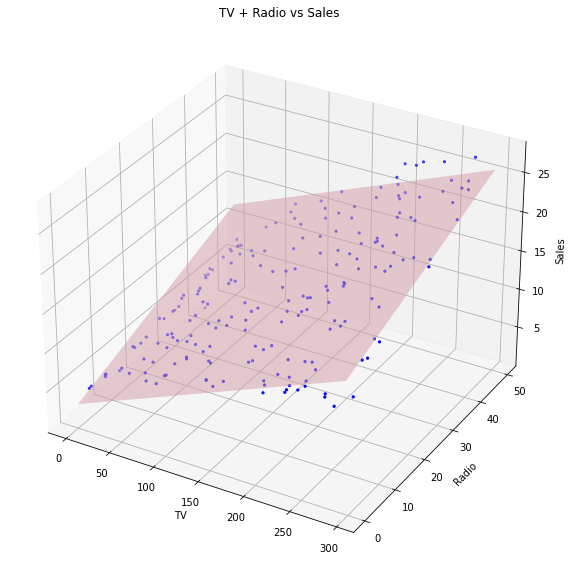

In [21]:
plotLinearRegression3D(ads.TV, ads.Radio, ads.Sales, lm.intercept_, lm.coef_[0], lm.coef_[1])

### 2.2 A multiple Linear Regression with 3D independent variables

This time we use all three independent variables. We also reserve some known data for validating the linear model.

In [22]:
from sklearn.model_selection import train_test_split

X = ads[['TV', 'Radio', 'Newspaper']]
y = ads['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We contruct and train the model.

In [23]:
model_3 = LinearRegression()
model_3 = model_3.fit(X_train, y_train)

Let's see the coefficients:

In [24]:
print(f'alpha = {model_3.intercept_}')
print(f'betas = {model_3.coef_}')

alpha = 2.9790673381226274
betas = [0.04472952 0.18919505 0.00276111]


This means our linear model is: predicted_sales = 2.979067338122629 + 0.04472952\*TV + 0.18919505\*Radio + 0.00276111\*Newspaper

We make predictions for the test data using the model.

In [25]:
y_pred = model_3.predict(X_test)

We check the regression errors according to **MAE**, **MSE** and **RMSE**:

In [26]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761037
Root Mean Squared Error: 1.78159966153345


Let's make a prediction for a 'new' X:

In [27]:
new_X = [[300, 45, 60]]
print(model_3.predict(new_X))

[25.07736688]


c:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Note**: Cross-Validation can be applied to validating regression as well. If you're interested, you may refer to the following readings: 
* https://www.statology.org/k-fold-cross-validation-in-python/
* https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression/notebook (more advanced)